In [88]:
#importing all necessary libraries and dependecy
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report




In [89]:
#loading the data


# Adjust the delimiter and path as necessary
train_data = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Data\codsodt_datas\Genre Classification Dataset\train_data.txt", delimiter=' ::: ', engine='python', names=["ID", "TITLE", "GENRE", "DESCRIPTION"])






In [90]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [91]:
test_data = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Data\codsodt_datas\Genre Classification Dataset\test_data.txt", delimiter=' ::: ', engine='python', names=["ID", "TITLE", "DESCRIPTION"])
test_solution = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Data\codsodt_datas\Genre Classification Dataset\test_data_solution.txt", delimiter=' ::: ', engine='python', names=["ID", "GENRE"])

In [92]:
test_data.head()



,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [93]:
test_solution.head()


,,ID,GENRE
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [94]:
print(train_data.describe())

                 ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000


In [95]:
train_data.describe()  #to get statical overview of the data

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [97]:
#checking the null values 
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

Here we can see the training data dont have any null values 



# EDA analysis and visualization of data  


In [98]:
print(train_data.dtypes)


ID              int64
TITLE          object
GENRE          object
DESCRIPTION    object
dtype: object


In [99]:
train_data['GENRE'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [100]:
train_data['GENRE'].value_counts()

GENRE
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

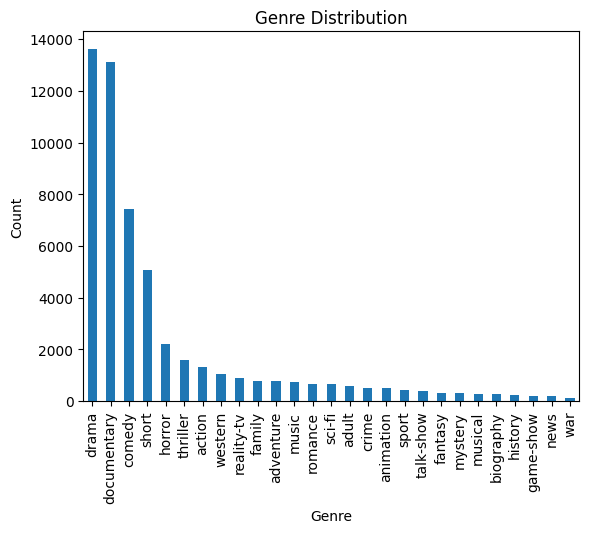

In [101]:
#lets explore genere distribution 
import matplotlib.pyplot as plt

genre_counts = train_data['GENRE'].value_counts()
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()


In [102]:
#analysing descreption lenghth to understand text data better 
train_data['Description_Length'] = train_data['DESCRIPTION'].apply(len)

print(train_data['Description_Length'].describe())





count    54214.000000
mean       599.452429
std        446.026620
min         41.000000
25%        324.000000
50%        463.000000
75%        712.000000
max      10503.000000
Name: Description_Length, dtype: float64


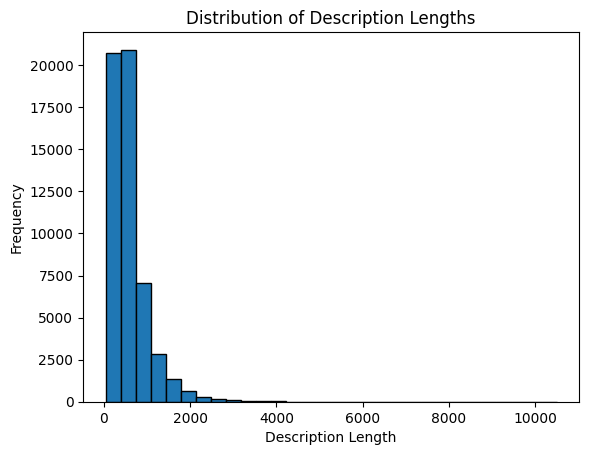

In [103]:
# Plot distribution of description lengths
train_data['Description_Length'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Description Lengths')
plt.show()

([<matplotlib.patches.Wedge at 0x24ca405b3a0>,
 [Text(0.7751309949797235, 0.7804946768695762, ' drama '),
  Text(-0.762411599254371, 0.7929240526824701, ' thriller '),
  Text(-1.0193078604662529, -0.41353534986952456, ' adult '),
  Text(-0.4882198001603478, -0.9857187361166421, ' documentary '),
  Text(-0.041995508176080186, -1.099198060994029, ' comedy '),
  Text(0.1987991203910609, -1.0818867360919722, ' crime '),
  Text(0.37731412834351874, -1.0332637845934458, ' reality-tv '),
  Text(0.5139250513297923, -0.9725641580973826, ' horror '),
  Text(0.618520985526583, -0.9096327778082893, ' sport '),
  Text(0.7034197140377126, -0.8456953978254244, ' animation '),
  Text(0.7768483440573641, -0.7787853685935114, ' action '),
  Text(0.8417701700470587, -0.7081122656888145, ' fantasy '),
  Text(0.896496379575944, -0.6374121440694595, ' short '),
  Text(0.942551260036864, -0.5670953378426947, ' sci-fi '),
  Text(0.9807462120117615, -0.4981333833669264, ' music '),
  Text(1.0103592232128416, -

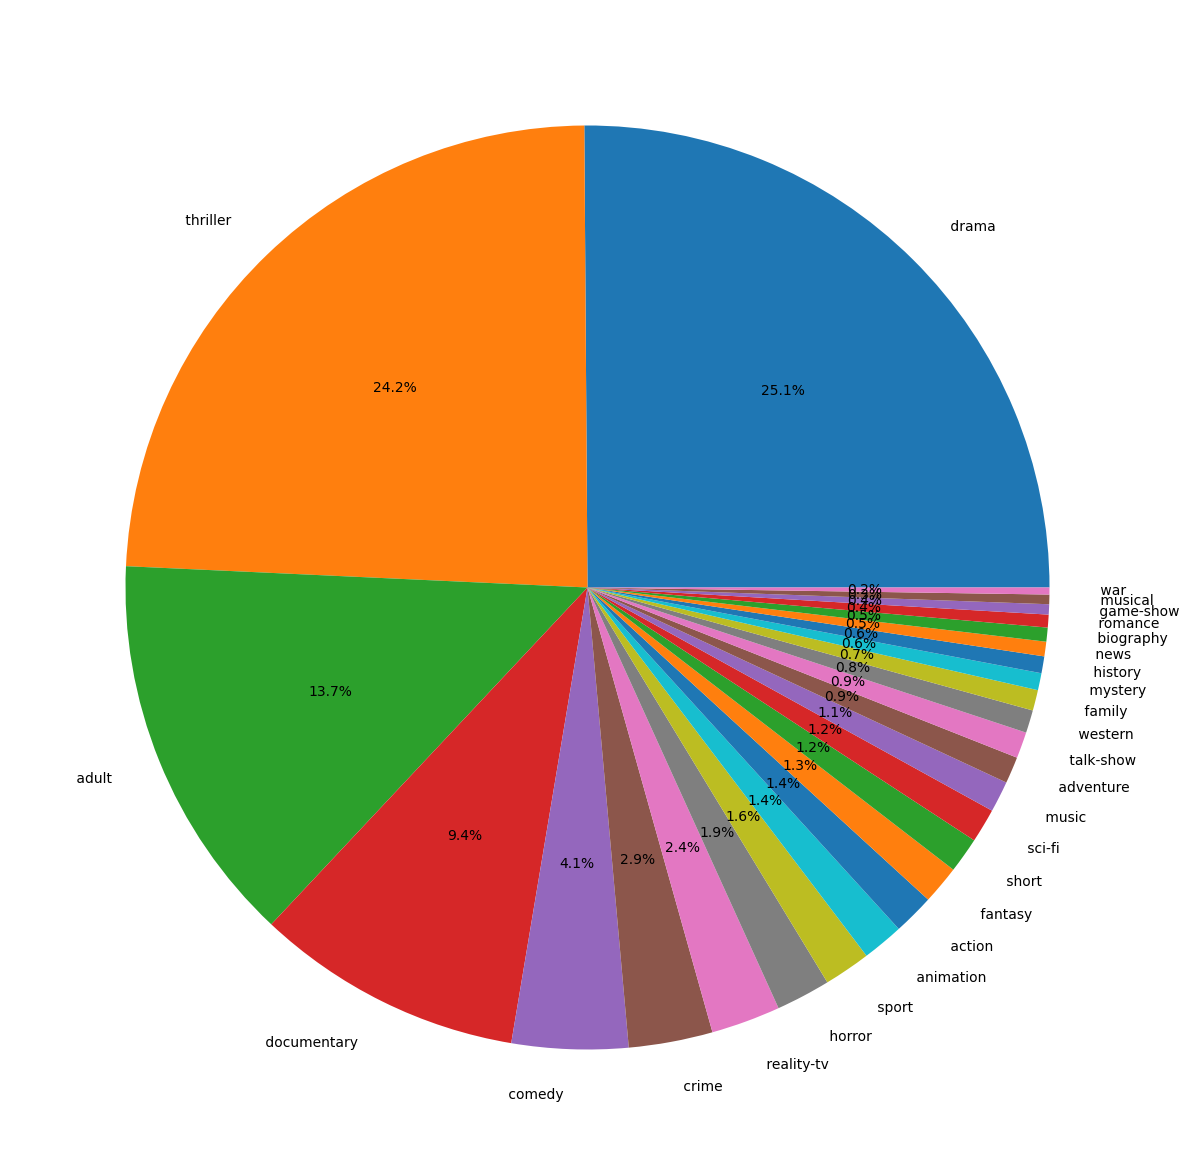

In [104]:
#plotting pie chart for GENRE for better visualizarion and understanding
plt.figure(figsize=(15,15))
plt.pie(train_data['GENRE'].value_counts(),labels=[' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '],autopct='%0.1f%%')

In [105]:
#Check for duplicates 
duplicates = train_data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


Number of duplicates: 0


In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  54214 non-null  int64 
 1   TITLE               54214 non-null  object
 2   GENRE               54214 non-null  object
 3   DESCRIPTION         54214 non-null  object
 4   Description_Length  54214 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [107]:
#lest explore sample descreption per genere
for genre in train_data['GENRE'].unique():
    print(f"\nGenre: {genre}")
    print(train_data[train_data['GENRE'] == genre]['DESCRIPTION'].sample(1).values[0])



Genre: drama
Korrine Stevens has it all; a successful husband, a luxurious home, an adorable baby. On the other hand, her husband is completely abusive, neglectful, and self-centered. When deciding to go back to school, Korrine meets an interesting group of people that open up her her world to new possibilities, and her mind to a forbidden place. In the midst of all of the turmoil in her life, could she have found a Woman that is everything she wants her Man to be?

Genre: thriller
An orphan guy goes for some maintenance work in an apartment. He get acquinted with a married lady and a relationship is being build between them. The lady's husband is a lawyer and a gang member. He finds out the relationship and the story goes in to twist and turns.

Genre: adult
Tony is interrupted from a session with his lover to hear his men kidnapped three rich daughters and one of their roommates. The roommate then seduces the first kidnapper, while one daughter and her buxom sister seduce the second

In [108]:
import nltk


# data cleaning and preprossing 


In [109]:
#Cleaning  the DESCRIPTION column by removing non-alphabet characters and converting text to lowercase
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

train_data['cleaned_description'] = train_data['DESCRIPTION'].apply(clean_text)
test_data['cleaned_description'] = test_data['DESCRIPTION'].apply(clean_text)


In [110]:
# remocing punctuation
def remove_punct(text):
    import string as st
    punct=st.punctuation
    new_text=''.join([char for char in text if char not in punct])
    return new_text

train_data['DESCRIPTION']=train_data['DESCRIPTION'].apply(lambda x:remove_punct(x))

In [111]:
train_data.tail()

,ID,TITLE,GENRE,DESCRIPTION,Description_Length,cleaned_description
54209,54210,"""Bonino"" (1953)",comedy,This shortlived NBC live sitcom centered on Bo...,506,this short lived nbc live sitcom centered on b...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION The sister...,780,the next generation of exploitation the siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,Ze bestaan echt is a standup comedy about grow...,254,ze bestaan echt is a stand up comedy about gr...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,641,walter and vivian live in the country and have...
54213,54214,Nature's Fury: Storm of the Century (2006),history,On Labor Day Weekend 1935 the most intense hur...,310,on labor day weekend the most intense h...


In [ ]:
#performing tokenization 
from nltk.tokenize import word_tokenize


def toknize(text):
    if isinstance(text, str) and text.strip() != "":  # Check if text is a non-empty string
        return word_tokenize(text)
    else:
        return []  # Return an empty list if it's not a valid string

# Ensure all entries are strings, then apply the tokenization function
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].fillna("").astype(str).apply(toknize)




In [116]:
train_data.tail()

,ID,TITLE,GENRE,DESCRIPTION,Description_Length,cleaned_description
54209,54210,"""Bonino"" (1953)",comedy,"[[, 'This, ', ,, 'shortlived, ', ,, 'NBC, ', ,...",506,this short lived nbc live sitcom centered on b...
54210,54211,Dead Girls Don't Cry (????),horror,"[[, 'The, ', ,, 'NEXT, ', ,, 'Generation, ', ,...",780,the next generation of exploitation the siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"[[, 'Ze, ', ,, 'bestaan, ', ,, 'echt, ', ,, 'i...",254,ze bestaan echt is a stand up comedy about gr...
54212,54213,Make Your Own Bed (1944),comedy,"[[, 'Walter, ', ,, 'and, ', ,, 'Vivian, ', ,, ...",641,walter and vivian live in the country and have...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"[[, 'On, ', ,, 'Labor, ', ,, 'Day, ', ,, 'Week...",310,on labor day weekend the most intense h...
